In [ ]:
!wget https://github.com/Gustavoohs/PDIcomPython/blob/master/Posts/Dados/cubo_L7.tif?raw=true

--2021-10-22 11:30:31--  https://github.com/Gustavoohs/PDIcomPython/blob/master/Posts/Dados/cubo_L7.tif?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Gustavoohs/PDIcomPython/raw/master/Posts/Dados/cubo_L7.tif [following]
--2021-10-22 11:30:31--  https://github.com/Gustavoohs/PDIcomPython/raw/master/Posts/Dados/cubo_L7.tif
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Gustavoohs/PDIcomPython/master/Posts/Dados/cubo_L7.tif [following]
--2021-10-22 11:30:31--  https://raw.githubusercontent.com/Gustavoohs/PDIcomPython/master/Posts/Dados/cubo_L7.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import numpy as np
import tifffile as tif
import matplotlib.pyplot as plt

In [ ]:
# Lendo imagem
L7 = tif.imread('cubo_L7.tif')

In [ ]:
# Função para cálculo de índices
def iveg(img):
  NDVI = (img[:,:,3] - img[:,:,2] )  /  ( img[:,:,3] + img[:,:,2])
  EVI =  2.5 * ((img[:,:,3] - img[:,:,2]) / (img[:,:,3] + 6 * img[:,:,2] - 7.5 * img[:,:,0] + 1))
  SAVI = ((img[:,:,3] - img[:,:,2]) / (img[:,:,3] + img[:,:,2] + 0.5)) * 1.5
  GCI = (img[:,:,3]/img[:,:,1]) - 1
  stack = np.dstack([NDVI,EVI,SAVI,GCI])
  stack = np.nan_to_num(stack)
  return stack

In [ ]:
# Gerando índices
indices = iveg(L7)

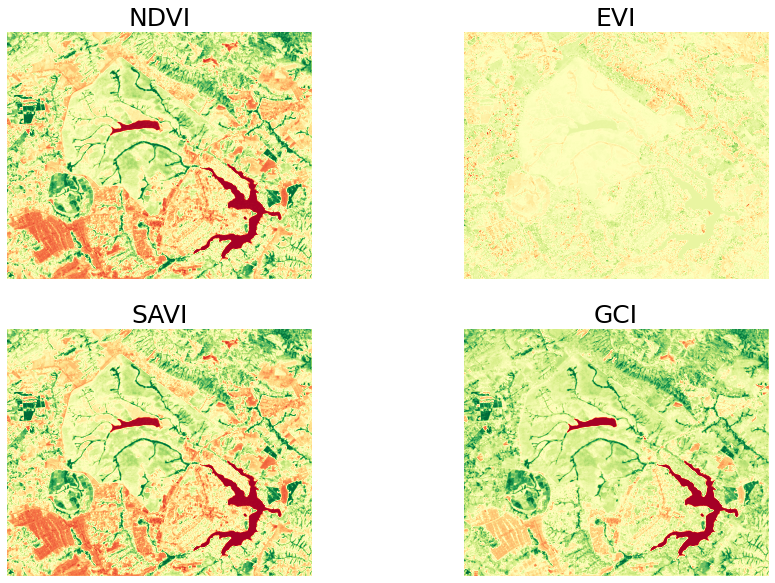

In [ ]:
# Visualizando resultado
nomes = ['NDVI','EVI','SAVI','GCI']

fig,axes = plt.subplots(2,2,sharex='all', sharey='all') 
axes = axes.ravel() 

for i in range(4): 
  c = axes[i].imshow(indices[:,:,i],cmap='RdYlGn') 
  axes[i].set_title(nomes[i],fontsize=25) 
  axes[i].axis('off')